# Imports des modules additionnels

In [1]:
import math as ma

In [2]:
from random import random

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

# Affichage d'un graphe

On veut visualiser la fonction $x\mapsto 2x(2-x)$

## Génération des points et des valeurs

In [5]:
N = 100
X = [2*c/N for c in range(N+1)]
Y = [2*x*(2-x) for x in X]
print(X)
print(Y)


[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0]
[0.0, 0.0792, 0.1568, 0.23279999999999998, 0.3072, 0.38, 0.45119999999999993, 0.5208, 0.5888, 0.6552, 0.7200000000000001, 0.7832, 0.8448, 0.9048, 0.9632000000000001, 1.02, 1.0752, 1.1288, 1.1808, 1.2312, 1.2800000000000002, 1.3272, 1.3728, 1.4168, 1.4592, 1.5, 1.5392000000000001, 1.5768, 1.6128, 1.6471999999999998, 1.68, 1.7111999999999998, 1.7408, 1.7688, 1.7952, 1.8199999999999998, 1.8432, 1.8648, 1.8848, 1.9

## Affichage simple

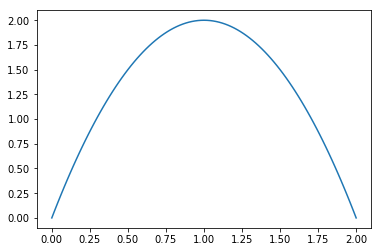

In [6]:
plt.plot(X,Y)

## Pour modifier la taille des graphiques

In [7]:
plt.rc("figure", figsize=(12,8))

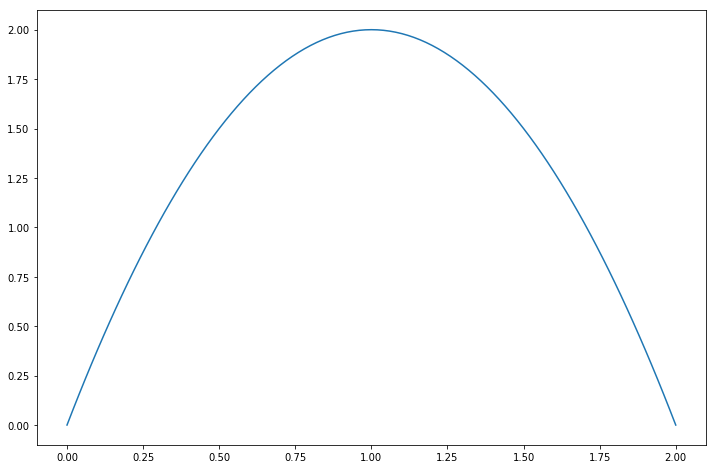

In [8]:
plt.plot(X,Y)

## Pour affiner l'affichage, on peut passer des options

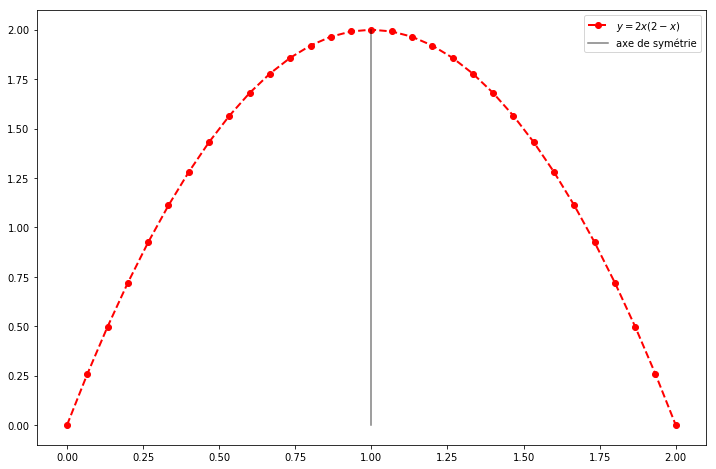

In [9]:
N = 30
X = [2*n/N for n in range(N+1)]
Y = [2*x*(2-x) for x in X]

plt.plot(X, Y,
         linewidth=2,
         color="red",
         linestyle="--",
         marker="o",
         label="$y=2x(2-x)$"
        )
plt.plot([1, 1], [0, 2], color="black", alpha=0.5, label="axe de symétrie")
plt.legend(loc="best");


# Exercice

- Afficher le graphe $y=\ln(1+x) e^{-x}x$
- Dessiner la courbe $x=(1+\cos(2t)+\sin^2(2t))\cos(t)$, $y=(1+\cos(2t)+\sin^2(2t))\sin(t)$

## Graphe

In [10]:
N = 10
X = [7*n/(2*N)-1/2 for n in range(N+1)]
print(X)

[-0.5, -0.15000000000000002, 0.19999999999999996, 0.55, 0.8999999999999999, 1.25, 1.6, 1.9500000000000002, 2.3, 2.65, 3.0]


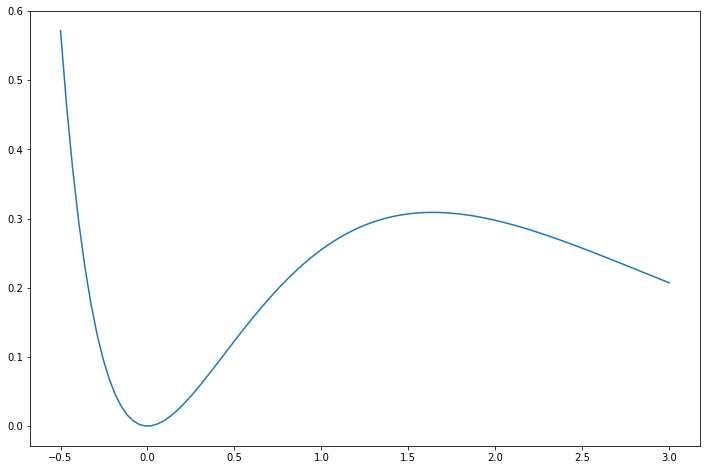

In [11]:
N = 100
X = [7*n/(2*N)-1/2 for n in range(N+1)]
Y = [x*ma.log(1+x)*ma.exp(-x) for x in X]
plt.plot(X, Y)

## Courbe

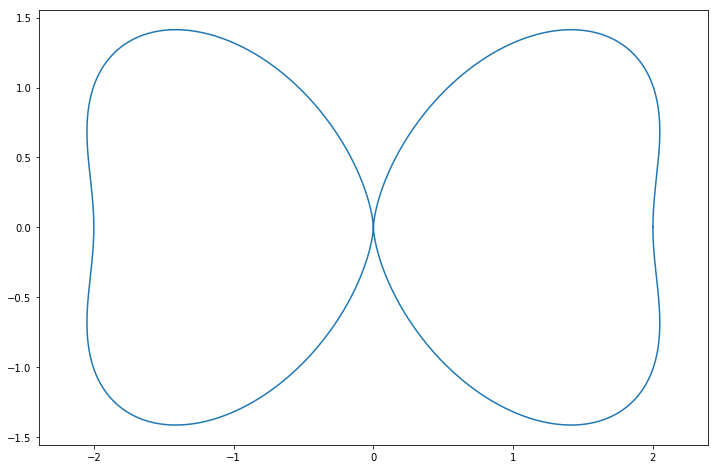

In [12]:
N = 1000

a, b = 2*ma.pi/N, 0
T = [a*n+b for n in range(N+1)]

def fonction(t):
    return 1+ma.cos(2*t)+(ma.sin(2*t))**2
X = [fonction(t)*ma.cos(t) for t in T]
Y = [fonction(t)*ma.sin(t) for t in T]

plt.plot(X, Y)
plt.axis("equal");

# Affichage de points

## Première tentative avec `plot`

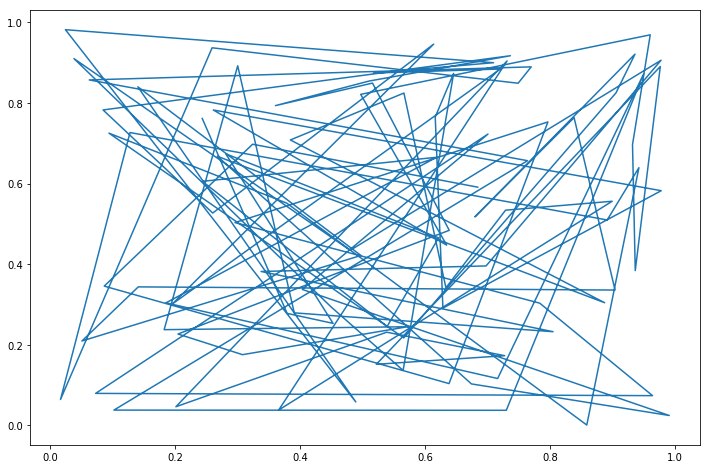

In [13]:
N = 100
X = [random() for i in range(N)]
Y = [random() for i in range(N)]

plt.plot(X, Y)

## Adaptation à la structure désorganisée des points via `scatter`

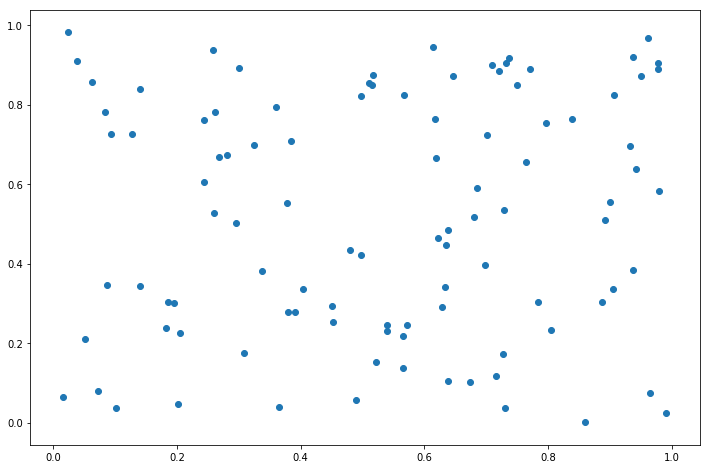

In [14]:
plt.scatter(X, Y)

## Amélioration pour attribuer une troisième valeurs au points via un code couleur

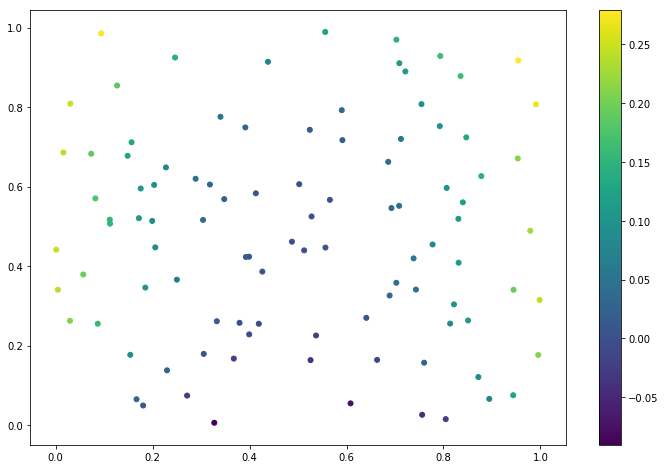

In [15]:
N = 100
X = [random() for i in range(N)]
Y = [random() for i in range(N)]

valeurs = [(x-0.5)**2+(y-0.5)**3 for x,y in zip(X, Y)]

plt.scatter(X, Y,
            s=25,
            c=valeurs,
            cmap="viridis"
           )
plt.colorbar();

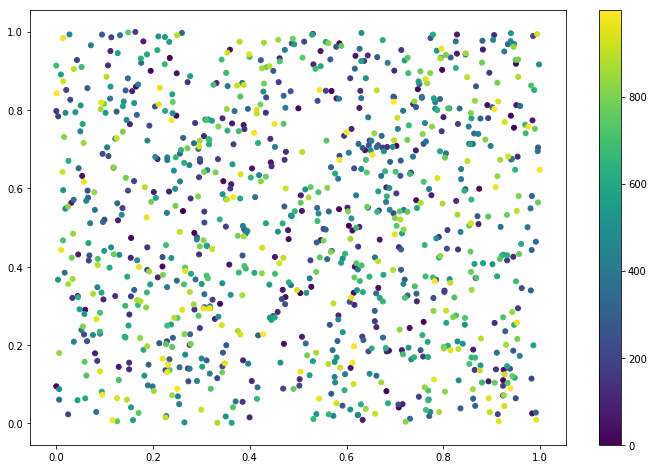

In [16]:
N = 1000
X = [random() for i in range(N)]
Y = [random() for i in range(N)]

plt.scatter(X, Y,
            s=25,
            c=range(N),
            cmap="viridis"
           )
plt.colorbar();

# Introduction à la méthode de Monte-Carlo

On lance des points aléatoirement dans le carré unitaire et compte combien de ceux-ci atterrissent dans la portion de disque unité.  
La loi des grands nombres assure que cette proportion tend vers le rapport des aire à savoir $\frac{\pi}{4}$.

In [17]:
def calcule_de_pi(N):
    X = [random() for i in range(N)]
    Y = [random() for i in range(N)]
    nb_dans_disque = 0
    for x,y in zip(X,Y):
        if x**2+y**2 < 1:
            nb_dans_disque += 1
    return 4*nb_dans_disque/N

In [18]:
print("pour 100 : ", calcule_de_pi(100))
print("pour 1000 : ", calcule_de_pi(1000))
print("pour 10000 : ", calcule_de_pi(10000))
print("pour 100000 : ", calcule_de_pi(10000))
print("pour 1000000 : ", calcule_de_pi(100000))

pour 100 :  3.64
pour 1000 :  3.124
pour 10000 :  3.1492
pour 100000 :  3.1584
pour 1000000 :  3.14168


In [19]:
def visualisation_de_pi(N):
    nb_de_points_valides = 0
    x_in, y_in, x_out, y_out = list(), list(), list(), list()
    for _ in range(N):
        x,y = random(), random()
        if x**2+y**2<1:
            nb_de_points_valides += 1
            x_in.append(x)
            y_in.append(y)
        else:
            x_out.append(x)
            y_out.append(y)
    plt.scatter(x_in, y_in, color="red", label="inside")
    plt.scatter(x_out, y_out, color="blue", label='outside')
    theta = [c*ma.pi/200 for c in range(101)]
    plt.plot([ma.cos(t) for t in theta], [ma.sin(t) for t in theta],
             color="black",
             alpha=0.6
            )
    plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color="black", alpha=0.6)
    plt.legend(loc="best")
    plt.axis("equal")
    plt.suptitle(f"{N} points uniforméments répartis")
    return 4*nb_de_points_valides/N

3.16

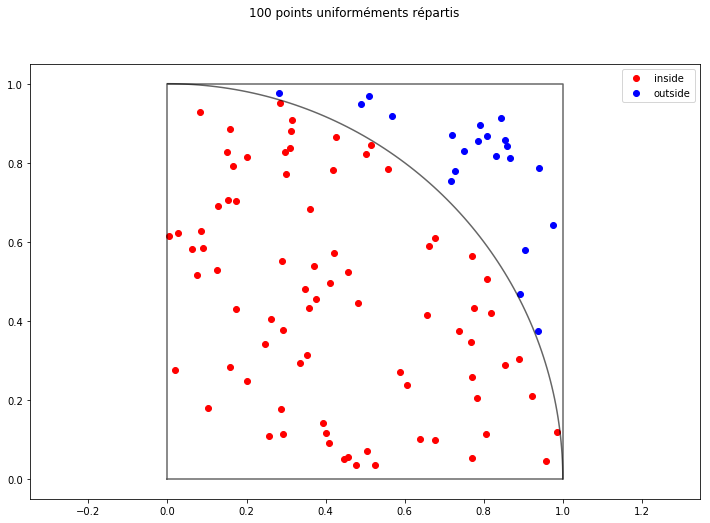

In [20]:
visualisation_de_pi(100)

3.14

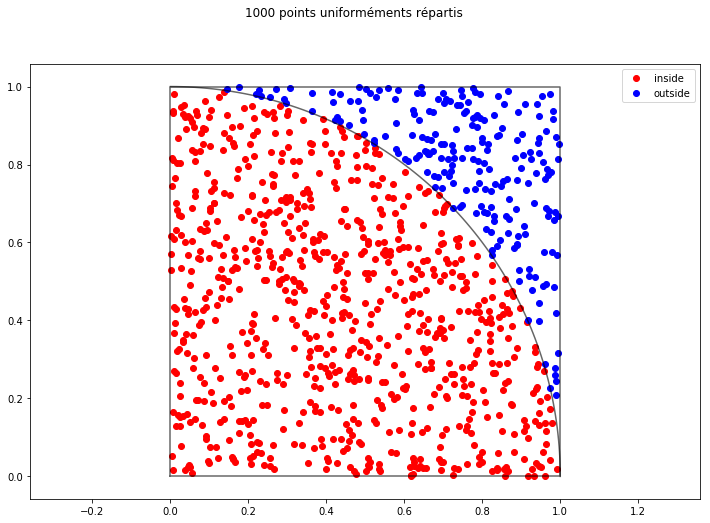

In [21]:
visualisation_de_pi(1_000)

3.1172

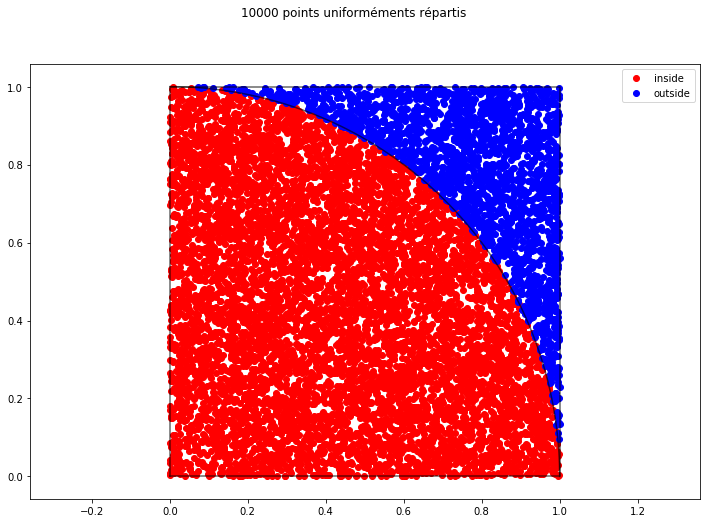

In [22]:
visualisation_de_pi(10_000)

# Génération d'une loi discrète et affichage avec un diagramme en batons

In [23]:
def diagramme_baton(N):
    uniforme = [random() for i in range(N)]
    pile_ou_face = [1 if v > 0.5 else 0 for v in uniforme]
    plt.bar([0, 1], [pile_ou_face.count(0)/N, pile_ou_face.count(1)/N],
            width=0.6);
    plt.plot([-0.3, 1.3], [0.5, 0.5], alpha=0.5, color="black");

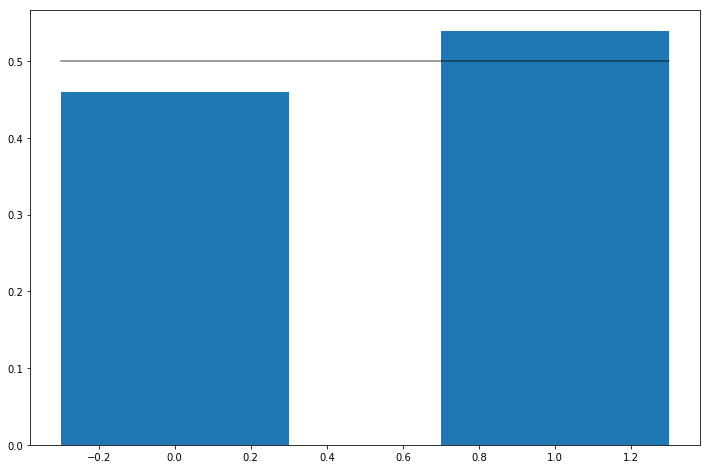

In [24]:
diagramme_baton(100)

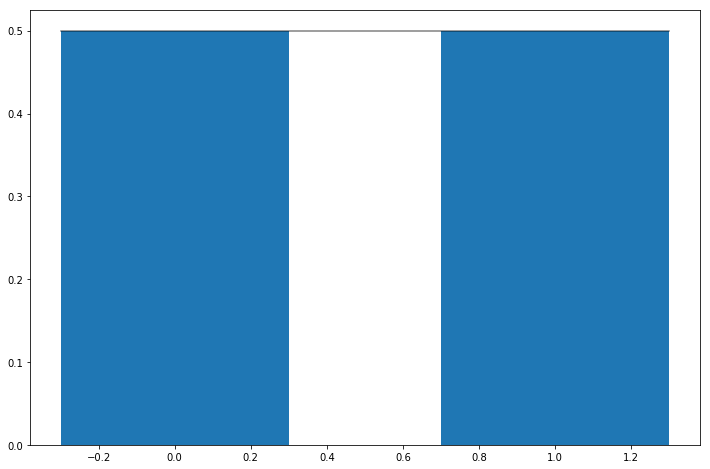

In [25]:
diagramme_baton(1000000)

# Exercice
Simuler un dés à 6 faces

In [26]:
def test(x):
    if x < 1/6:
        return 1
    elif x < 2/6:
        return 2
    elif x < 3/6:
        return 3
    elif x < 4/6:
        return 4
    elif x < 5/6:
        return 5
    else:
        return 6

In [27]:
def simulation_des(N):
    uniforme = [random() for i in range(N)]
    des_six_faces = [test(v) for v in uniforme]
    plt.bar(range(1,7), [des_six_faces.count(f)/N for f in range(1, 7)],
            width=0.6);
    plt.plot([0.7, 6.3], [1/6, 1/6], alpha=0.5, color="black");

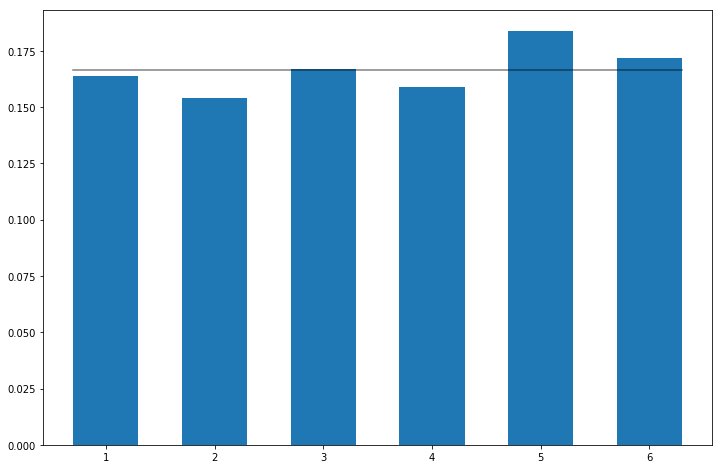

In [28]:
simulation_des(1000)

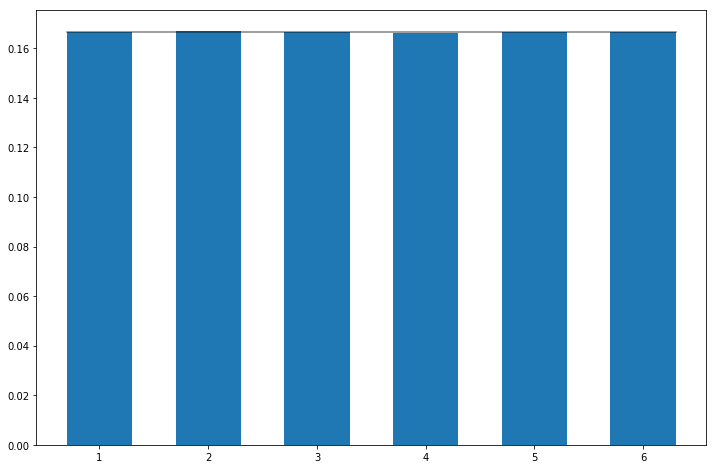

In [29]:
simulation_des(1000000)

## Visualisation 
- de la distribution avec un histogramme, 
- et de la fonction de répartition avec un histogramme cumulatif

(array([ 98., 104.,  79., 100., 106., 100.,  88., 109., 100., 116.]),
 array([7.95596554e-04, 1.00415119e-01, 2.00034641e-01, 2.99654163e-01,
        3.99273685e-01, 4.98893207e-01, 5.98512729e-01, 6.98132251e-01,
        7.97751773e-01, 8.97371295e-01, 9.96990817e-01]),
 <a list of 10 Patch objects>)

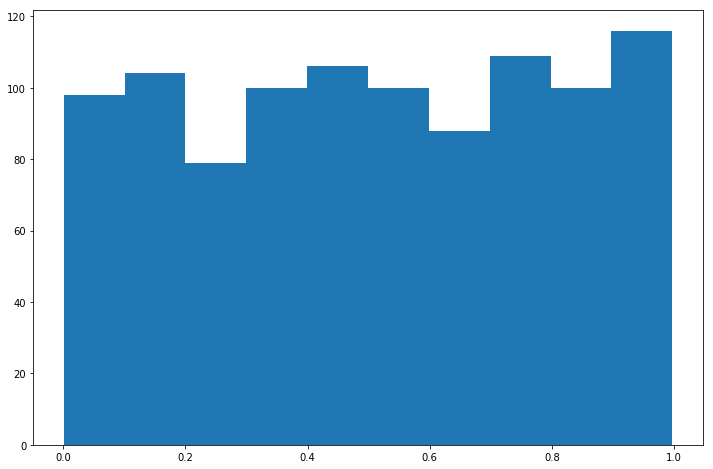

In [30]:
N = 1000
X = [random() for _ in range(N)]
plt.hist(X)

(array([  88.,  185.,  289.,  391.,  501.,  590.,  692.,  790.,  886.,
        1000.]),
 array([4.78025840e-04, 1.00153216e-01, 1.99828406e-01, 2.99503596e-01,
        3.99178786e-01, 4.98853977e-01, 5.98529167e-01, 6.98204357e-01,
        7.97879547e-01, 8.97554737e-01, 9.97229927e-01]),
 <a list of 10 Patch objects>)

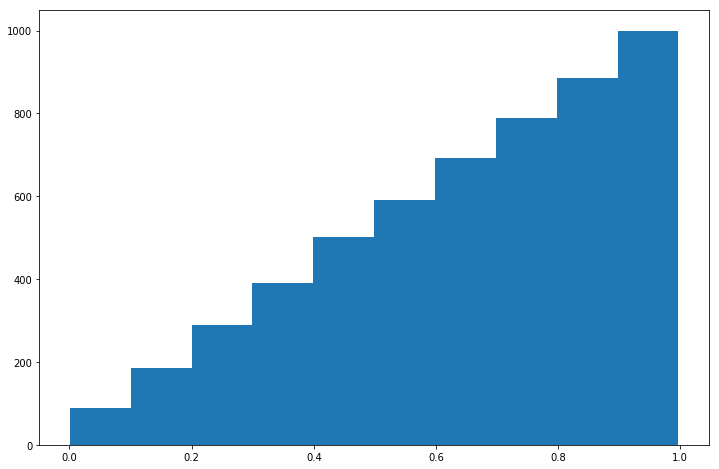

In [31]:
N = 1000
X = [random() for _ in range(N)]
plt.hist(X, cumulative=True)

## Bigouillage
On peut également trier la liste des entrés pour obtenir la fonction de répartition empirique.

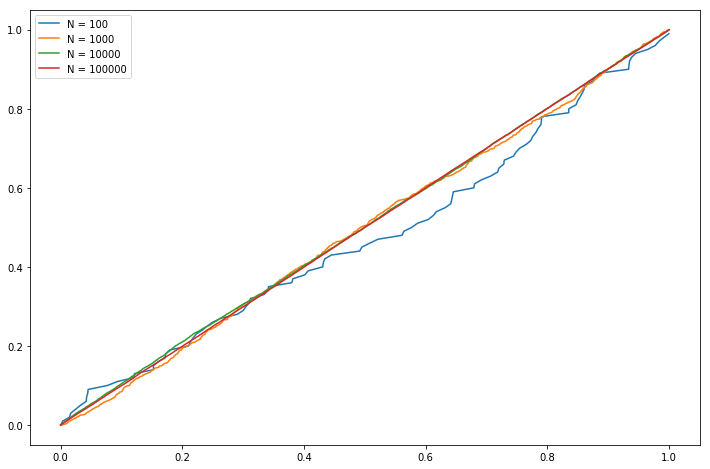

In [32]:
N = 100
X = [random() for _ in range(N)]
plt.plot(sorted(X), [n/N for n in range(N)], label='N = {}'.format(N))
N = 1000
X = [random() for _ in range(N)]
plt.plot(sorted(X), [n/N for n in range(N)], label='N = {}'.format(N))
N = 10000
X = [random() for _ in range(N)]
plt.plot(sorted(X), [n/N for n in range(N)], label='N = {}'.format(N))
N = 100000
X = [random() for _ in range(N)]
plt.plot(sorted(X), [n/N for n in range(N)], label='N = {}'.format(N))
plt.legend(loc="best")
plt.savefig("test.png", dpi=100)

On constate que l'on tend bien vers la fonction $x\mapsto x$ entre $0$ et $1$.